In [1]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt




In [2]:
# getting data folders from Github
!git clone https://github.com/fatihcihant/kaggle-Fruits360-


Cloning into 'kaggle-Fruits360-'...
remote: Enumerating objects: 90757, done.
remote: Total 90757 (delta 0), reused 0 (delta 0), pack-reused 90757
Receiving objects: 100% (90757/90757), 718.53 MiB | 19.40 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (90487/90487), done.


In [14]:
train_path = "/content/kaggle-Fruits360-/fruits-360_dataset/fruits-360/Training/"
test_path = "/content/kaggle-Fruits360-/fruits-360_dataset/fruits-360/Test/"

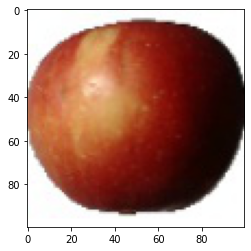

In [65]:
from tensorflow.keras.utils import load_img, img_to_array
temp_image = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(temp_image) 

In [16]:
x = img_to_array(temp_image)
x.shape # 3 means rgb

(100, 100, 3)

In [42]:
from glob import glob
className = glob(train_path + "/*") # take all name in train path...
numberOfClass = len(className)
numberOfClass

131

In [43]:
from keras.layers.core.activation import Activation
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = x.shape, activation = "relu"))
model.add(MaxPool2D()) 

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D()) 

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D()) 

model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))

  # output layer
model.add(Dense(numberOfClass, activation = "softmax"))

from keras.optimizers.optimizer_experimental import optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop


model.compile(optimizer = "rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])


batch_size = 32 # describes how many images will be processed in each iteration

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 64)      

In [46]:
# Data Augmentation
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,# feature scaling
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) # train_set is normalized so test_set must also be


training_set = train_datagen.flow_from_directory(train_path,
                                                target_size = x.shape[:2], # we don't need 3 (number of channel info)
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 color_mode = "rgb"
                                                )
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = x.shape[:2], 
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            color_mode = "rgb")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [48]:
hist = model.fit_generator(generator = training_set, 
                 validation_data = test_set, 
                 epochs = 100, 
                 steps_per_epoch = (1600//batch_size), 
                 validation_steps = (800 // batch_size))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
50/50 [==============================] - 34s 639ms/step - loss: 4.7190 - accuracy: 0.0350 - val_loss: 4.0283 - val_accuracy: 0.0675
Epoch 2/100
50/50 [==============================] - 32s 640ms/step - loss: 3.7205 - accuracy: 0.1238 - val_loss: 3.4494 - val_accuracy: 0.0850
Epoch 3/100
50/50 [==============================] - 32s 644ms/step - loss: 3.0027 - accuracy: 0.2075 - val_loss: 2.5121 - val_accuracy: 0.3113
Epoch 4/100
50/50 [==============================] - 32s 642ms/step - loss: 2.4122 - accuracy: 0.3419 - val_loss: 1.8853 - val_accuracy: 0.4963
Epoch 5/100
50/50 [==============================] - 34s 678ms/step - loss: 2.0039 - accuracy: 0.4338 - val_loss: 1.5179 - val_accuracy: 0.6087
Epoch 6/100
50/50 [==============================] - 34s 686ms/step - loss: 1.6351 - accuracy: 0.5362 - val_loss: 1.1746 - val_accuracy: 0.6637
Epoch 7/100
50/50 [==============================] - 32s 643ms/step - loss: 1.3988 - accuracy: 0.5744 - val_loss: 0.8843 - val_accuracy:


* steps_per_epoch is greater than the all train samples.The pictures produced by ImageDataGenerator will complete our missing images.

So, we have learned the difference between Keras.fit and Keras.fit_generator functions used to train a deep learning neural network
.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

In [49]:
model.save_weights("model.h5")

In [50]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


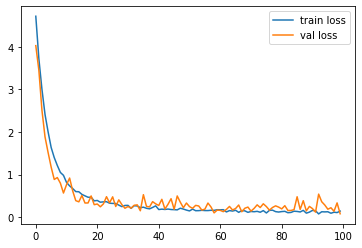

In [51]:
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()

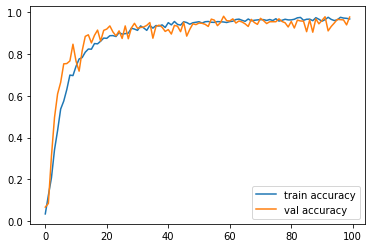

In [56]:
plt.plot(hist.history["accuracy"], label = "train accuracy")
plt.plot(hist.history["val_accuracy"], label = "val accuracy")
plt.legend()
plt.show()

In [96]:

import numpy as np
from keras.preprocessing import image
import tensorflow as tf

test_image_path = "/content/kaggle-Fruits360-/fruits-360_dataset/fruits-360/Test/Watermelon/125_100.jpg"
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size = (100,100))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0) # our model is trained with batches so we have to add extra dimension to run single image
result = model.predict(test_image/255.0)
result_class = np.argmax(result, axis = 1)
print(training_set.class_indices)

print(result_class)





1/1 [==============================] - 0s 87ms/step
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'G